# Analisi dell'Accesso all'Elettricità - Progetto Data Science


#**A- Descrizione del dataset**

Il dataset contiene i dati relativi all’accesso all’elettricità (espresso come percentuale della popolazione) per diversi paesi nel periodo 2012–2016, insieme all’indicazione del continente di appartenenza di ciascun paese.

#**B- Esplorazione iniziale**

###Import librerie e dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Caricamento del dataset


In [ ]:
df = pd.read_csv('access_electricity.csv')
df.head()


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


###Per visualizzare le informazioni generali del DataFrame.


In [ ]:
num_righe, num_colonne = df.shape
print(f"Numero righe: {num_righe}, Numero colonne: {num_colonne}")


Numero righe: 242, Numero colonne: 10


##### commento: il dataframe contiene 242 righe e 10 colonne.

###Per visualizzare le statistiche descrittive di tutte le colonne numeriche.


In [ ]:
df.describe()


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
count,242,242,242,242,242,242,242,242,242,228
unique,242,242,1,1,160,159,153,144,122,6
top,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Africa
freq,1,1,242,242,79,82,87,94,119,56


###Identificazione delle colonne anno (prendendo esempio'2012 [YR2012]')


In [ ]:
year_cols = [c for c in df.columns if '[YR' in c]

###Trasformazione in formato long


In [ ]:
long_df = df.melt(id_vars=['Country Name','Country Code','Series Name','Series Code','Continent'],value_vars=year_cols, var_name='EtichettaAnno', value_name='Accesso_Elettricita')

### Estrai l'anno come intero


In [ ]:
long_df['Anno'] = long_df['EtichettaAnno'].str.extract(r'(\d{4})').astype(int)


### Conversione a numerico (gestione valori non numerici come '..')


In [ ]:
long_df['Accesso_Elettricita'] = pd.to_numeric(long_df['Accesso_Elettricita'], errors='coerce')


### Manteniamo solo la serie principale (se il CSV includesse più indicatori)


In [ ]:
mask_main = long_df['Series Name'].str.contains('Access to electricity', case=False, na=False)
clean_df = long_df.loc[mask_main].copy()

### Rimuoviamo righe con valore mancante nella metrica principale


In [ ]:
clean_df = clean_df.dropna(subset=['Accesso_Elettricita'])

In [ ]:
clean_df.head()


,Country Name,Country Code,Series Name,Series Code,Continent,EtichettaAnno,Accesso_Elettricita,Anno
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2012 [YR2012],69.100000,2012
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012 [YR2012],100.000000,2012
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2012 [YR2012],98.764660,2012
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012 [YR2012],100.000000,2012
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2012 [YR2012],35.821964,2012


####commento: Il risultato mostra le prime righe del DataFrame pulito clean_df, con informazioni su Paese, codice, continente, anno e percentuale di accesso all’elettricità per il 2012.

#**C- Analisi introduttiva dei dati**



###1- Dimensioni

In [ ]:
dim_wide = df.shape
dim_long = clean_df.shape
print("Dimensioni wide:", dim_wide, " — Dimensioni long (pulito):", dim_long)

Dimensioni wide: (242, 10)  — Dimensioni long (pulito): (1198, 8)


####commento: Il DataFrame originale (“wide”) ha 242 righe e 10 colonne, mentre quello trasformato (“long”) ne ha 1198 righe e 8 colonne, segno che i dati sono stati ristrutturati e ampliati in formato lungo.

###2- Tipi di dato

In [ ]:
dtypes = clean_df.dtypes
display(dtypes)

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Continent,object
EtichettaAnno,object
Accesso_Elettricita,float64
Anno,int64


#### commento: Mostra che i tipi di dato di ogni colonna: quasi tutte sono stringhe (object), tranne Accesso_Elettricità che è float64 e Anno che è int64.

###3- Missing principali


In [ ]:
missing = clean_df.isna().sum().sort_values(ascending=False)
display(missing.head(10))


,0
Continent,68
Country Name,0
Series Name,0
Country Code,0
Series Code,0
EtichettaAnno,0
Accesso_Elettricita,0
Anno,0


####commento: Solo la colonna “Continent” ha valori mancanti (68), mentre tutte le altre non presentano dati nulli.

###4- Statistiche descrittive


In [ ]:
display(clean_df['Accesso_Elettricita'].describe())


,Accesso_Elettricita
count,1198.000000
mean,82.424919
std,27.707796
min,4.912345
25%,73.930088
50%,99.245768
75%,100.000000
max,100.000000


#### commento: La variabile Accesso_Elettricità ha una media dell’82.4%, con valori tra 4.9% e 100%; la maggior parte dei Paesi ha un accesso molto alto, vicino al 100%.

#**D- Selezioni di dati**

#### 1).loc — Italia su tutti gli anni (ordinato per anno)


In [ ]:
sel1 = clean_df.loc[clean_df['Country Name']=='Italy', ['Country Name','Anno','Accesso_Elettricita']].sort_values('Anno')
sel1.head(10)

,Country Name,Anno,Accesso_Elettricita
105,Italy,2012,100.0
347,Italy,2013,100.0
589,Italy,2014,100.0
831,Italy,2015,100.0
1073,Italy,2016,100.0


#### commento: il risultato ostra i dati dell’Italia dal 2012 al 2016: l’accesso all’elettricità è costantemente al 100% in tutti gli anni considerati.

###2).loc — Africa nel 2016 (dal più alto al più basso)


In [ ]:
sel2 = clean_df.loc[(clean_df['Continent']=='Africa') & (clean_df['Anno']==2016),
                    ['Country Name','Continent','Anno','Accesso_Elettricita']].sort_values('Accesso_Elettricita', ascending=False)
sel2.head(15)

,Country Name,Continent,Anno,Accesso_Elettricita
1029,"Egypt, Arab Rep.",Africa,2016,100.000000
1188,Tunisia,Africa,2016,100.000000
1157,Seychelles,Africa,2016,100.000000
1120,Morocco,Africa,2016,100.000000
970,Algeria,Africa,2016,99.439568
1110,Mauritius,Africa,2016,98.781784
1093,Libya,Africa,2016,98.536728
1001,Cabo Verde,Africa,2016,92.611588
1045,Gabon,Africa,2016,91.395500
1165,South Africa,Africa,2016,84.200000


#### commento: il risultato mostra i Paesi africani nel 2016, ordinati per accesso all’elettricità decrescente: in testa Egitto, Tunisia, Seychelles e Marocco con 100%, mentre i valori più bassi si trovano attorno al 65%.

###3).iloc — prime 10 righe, colonne chiave





In [ ]:
sel3 = clean_df.iloc[:10, :][['Country Name','Anno','Accesso_Elettricita']]
sel3

,Country Name,Anno,Accesso_Elettricita
0,Afghanistan,2012,69.100000
1,Albania,2012,100.000000
2,Algeria,2012,98.764660
4,Andorra,2012,100.000000
5,Angola,2012,35.821964
6,Antigua and Barbuda,2012,95.254692
7,Arab World,2012,87.288244
8,Argentina,2012,99.584412
9,Armenia,2012,99.878876
10,Aruba,2012,94.255814


#### commento: il risultato visualizza le prime 10 righe del dataset con Paese, anno e accesso all’elettricità (2012): i valori variano molto, da 35.8% (Angola) a 100% (Albania, Andorra).

###4) .iloc — blocco di righe 100–115, colonne selezionate per indice (0:Country Name,1:Country Code, ? Accesso, ? Anno)
###Individuiamo gli indici delle colonne principali in clean_df

In [ ]:
cols = list(clean_df.columns)
idx_country = cols.index('Country Name')
idx_code = cols.index('Country Code')
idx_value = cols.index('Accesso_Elettricita')
idx_year = cols.index('Anno')

block_rows = slice(100, 116)
block_cols = [idx_country, idx_code, idx_value, idx_year]
sel4 = clean_df.iloc[block_rows, block_cols]
sel4


,Country Name,Country Code,Accesso_Elettricita,Anno
102,Ireland,IRL,100.000000,2012
103,Isle of Man,IMN,100.000000,2012
104,Israel,ISR,100.000000,2012
105,Italy,ITA,100.000000,2012
106,Jamaica,JAM,93.100000,2012
107,Japan,JPN,100.000000,2012
108,Jordan,JOR,99.500000,2012
109,Kazakhstan,KAZ,99.874733,2012
110,Kenya,KEN,30.271000,2012
111,Kiribati,KIR,76.506287,2012


#### commento: il risultato mostra le righe da 100 a 115 (più alcune successive) con Paese, codice, accesso all’elettricità e anno 2012: quasi tutti i Paesi hanno valori prossimi o pari al 100%, tranne alcuni (es. Kenya 30.3%, Corea del Nord 32%).

#**D-Ordinamenti**

###1-crescente

In [ ]:
asc_2016 = clean_df[clean_df['Anno']==2016].sort_values('Accesso_Elettricita', ascending=True)[
    ['Country Name','Anno','Accesso_Elettricita','Continent']
].head(15)
asc_2016


,Country Name,Anno,Accesso_Elettricita,Continent
1000,Burundi,2016,7.588477,Africa
1007,Chad,2016,8.830898,Africa
1167,South Sudan,2016,8.947628,Africa
1103,Malawi,2016,11.000000,Africa
1006,Central African Republic,2016,13.985112,Africa
1057,Guinea-Bissau,2016,14.655790,Africa
1130,Niger,2016,16.217234,Africa
1013,"Congo, Dem. Rep.",2016,17.147379,Africa
999,Burkina Faso,2016,19.164713,Africa
1092,Liberia,2016,19.800000,Africa


####Commento: Elenco in ordine crescente di accesso all’elettricità nel 2016: i Paesi con minori valori sono quasi tutti africani, con Burundi (7.6%) il più basso e Mozambico (~23%) tra i più alti del gruppo.

###2-descrecente

In [ ]:
pivot = clean_df.pivot_table(index=['Country Name','Continent'], columns='Anno', values='Accesso_Elettricita', aggfunc='mean')
if set([2012, 2016]).issubset(pivot.columns):
    pivot['Miglioramento_2012_2016'] = pivot[2016] - pivot[2012]
    improv = pivot.dropna(subset=['Miglioramento_2012_2016']).sort_values('Miglioramento_2012_2016', ascending=False).reset_index()
    improv.head(15)
else:
    print('Colonne 2012 o 2016 non presenti per il calcolo del miglioramento.')


####commento: Il codice crea una pivot table per confrontare l’accesso all’elettricità tra 2012 e 2016 e calcola il miglioramento. Poi ordina i Paesi in ordine decrescente di crescita: i primi sono quelli che hanno aumentato di più l’accesso in quel periodo.

#**E- Nuova colonna con apply + lambda**
Definiamo una classificazione qualitativa dell’accesso all’elettricità, utile a semplificare la comunicazione dei risultati:
- **Alto (≥90%)**
- **Medio (50–89%)**
- **Basso (<50%)**


In [ ]:
def categorizza(v):
    if pd.isna(v):
        return np.nan
    return 'Alto (>=90%)' if v >= 90 else ('Medio (50–89%)' if v >= 50 else 'Basso (<50%)')

clean_df['Classe_Accesso'] = clean_df['Accesso_Elettricita'].apply(lambda x: categorizza(x))
clean_df[['Country Name','Anno','Accesso_Elettricita','Classe_Accesso']].head()


,Country Name,Anno,Accesso_Elettricita,Classe_Accesso
0,Afghanistan,2012,69.100000,Medio (50–89%)
1,Albania,2012,100.000000,Alto (>=90%)
2,Algeria,2012,98.764660,Alto (>=90%)
4,Andorra,2012,100.000000,Alto (>=90%)
5,Angola,2012,35.821964,Basso (<50%)


#### commento: La funzione classifica i Paesi in tre fasce di accesso all’elettricità: Alto (≥90%), Medio (50–89%), e Basso (<50%).
####L’esempio mostra correttamente i valori categorizzati per i primi Paesi.

#**F-Grafici**



1.  Istogramma


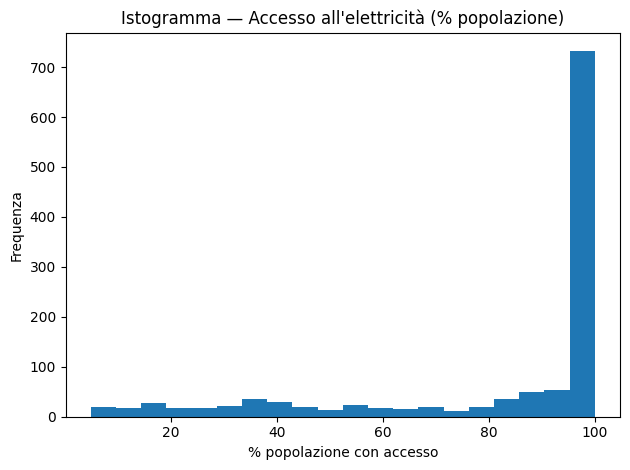

In [ ]:
clean_df['Accesso_Elettricita'].plot(kind='hist', bins=20)
plt.title('Istogramma — Accesso all\'elettricità (% popolazione)')
plt.xlabel('% popolazione con accesso')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

Commento:
La distribuzione risulta fortemente concentrata su valori elevati (con molti paesi oltre l’80–90%),ma presenta una coda sinistra che indica la presenza di paesi con un accesso ancora limitato all’elettricità.




2.  Boxplot



In [1]:
sns.boxplot(data=subset_2016, x='Continent', y='Accesso_Elettricita')
plt.title('Boxplot (Seaborn) — Accesso per continente (2016)')
plt.xlabel('Continente'); plt.ylabel('%'); plt.xticks(rotation=30); plt.show()

NameError: name 'sns' is not defined

commento:
Il boxplot mette in evidenza le disuguaglianze tra continenti:Europa e Nord America mostrano mediane elevate e una bassa variabilità,mentre altre regioni, come l’Africa, presentano mediane più basse e una maggiore dispersione.

3. Andamento temporale per Paesi selezionati






In [ ]:
selezionati = ['Italy','France','Germany','India','Nigeria','Brazil','China','United States']
campione = clean_df[clean_df['Country Name'].isin(selezionati)]
for cn in selezionati:
    tmp = campione[campione['Country Name']==cn].sort_values('Anno')
    plt.plot(tmp['Anno'], tmp['Accesso_Elettricita'], marker='o', label=cn)
plt.title('Andamento accesso all\'elettricità — Paesi selezionati')
plt.xlabel('Anno')
plt.ylabel('% popolazione con accesso')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

commento:
I Paesi industrializzati mantengono livelli prossimi al 100% per l’intero periodo,mentre le economie emergenti mostrano trend in crescita con progressi significativi in Asia e miglioramenti più graduali in Africa.

4. Matplotlib (Media globale per anno)

In [ ]:
media_globale = clean_df.groupby('Anno')['Accesso_Elettricita'].mean().reset_index()
plt.plot(media_globale['Anno'], media_globale['Accesso_Elettricita'], marker='o')
plt.title('Media globale di accesso all\'elettricità per anno')
plt.xlabel('Anno')
plt.ylabel('Media % popolazione con accesso')
plt.tight_layout()
plt.show()

commento: La media globale mostra un incremento nel periodo 2012–2016 segnalando un progresso complessivo verso l’obiettivo SDG 7,sebbene persistano forti disparità tra i Paesi.

5. Grafico a barre

In [ ]:
bottom10 = subset_2016.sort_values('Accesso_Elettricita', ascending=True).head(10)
plt.barh(bottom10['Country Name'], bottom10['Accesso_Elettricita'])
plt.title('Bottom 10 — Accesso all\'elettricità (2016)')
plt.xlabel('% popolazione con accesso')
plt.ylabel('Paese')
plt.tight_layout()
plt.show()

commento:
L’elenco dei 10 Paesi con i livelli di accesso più bassi evidenzia i contesti più critici,che richiedono interventi mirati su infrastrutture, reti rurali e investimenti per accelerare il processo di elettrificazione.

## Conclusioni e sviluppi futuri

**Cosa abbiamo osservato**
- La **media globale** dell'accesso all'elettricità cresce dal 2012 al 2016.
- Persistono **differenze regionali**: alcuni continenti mostrano valori stabilmente elevati,
  mentre altri mostrano maggiore variabilità e livelli più bassi.
- Alcuni Paesi in via di sviluppo hanno registrato **miglioramenti significativi** nel periodo.

